In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import pickle as pkl

#algos & estimators
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../../datasets/house_pricing.csv')
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


In [3]:
x = df[['Beds','Baths','SquareFeet']]
y  =df['Price']

In [4]:
feature_scaler = StandardScaler()

In [5]:
x = feature_scaler.fit_transform(x)

In [6]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size=.2,random_state=0)

In [28]:
model = RandomForestRegressor(n_estimators=90,n_jobs=-1,random_state=0)
model.fit(trainx,trainy)

RandomForestRegressor(n_estimators=90, n_jobs=-1, random_state=0)

In [29]:
model.score(x,y)*100

91.76494706873008

In [30]:
ypred = model.predict(x)

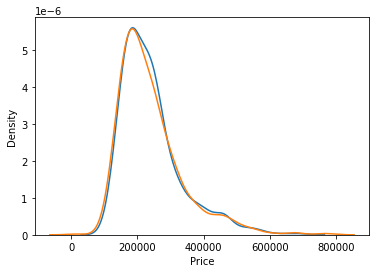

In [32]:
sns.distplot(ypred,hist=False)
sns.distplot(y,hist=False)
plt.show()

In [33]:
def save_model(path,model):
    with open(path,'wb') as f:
        pkl.dump(model,f)
    return path

def load_model(path):
    with open(path,'rb') as f:
       return pkl.load(f)

In [39]:
save_model('../../models/rfr_house_price_model.pkl',model)

'../../models/rfr_house_price_model.pkl'

In [38]:
save_model('../../models/rfr_feature_scaler_house_price.pkl',feature_scaler)

'../../models/rfr_feature_scaler_house_price.pkl'